# Исследовательский проект 

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
     - минута разговора: 3 рубля
     - сообщение: 3 рубля
     - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
    
Исходные данные о 500 пользователях и их поведении - таблицы calls, internet messages, также дан словарь с данными про два тарифа и датасет с информацией о пользователях - возраст, ФИО, город, является ли текущим пользователем и какой тариф использует. 

Необходимо проверить гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Содержание
1. [Описание данных](#step1)  
2. [Обработка данных](#step2)
3. [Анализ данных](#step3)
4. [Проверка гипотез](#step4)  
5. [Вывод](#step5) 

## 1. Описание данных <a id="step1"></a>   
</div>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st

try: 
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')
except: 
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

In [2]:
for data in [calls, internet, messages, tariffs, users]:
    display(data.info())
    display(data.head(15))
    display(data.describe().T)
    print(data.isna().sum())
    print()
    print(len(data))
    print()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


id           0
call_date    0
duration     0
user_id      0
dtype: int64

202607


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

149396


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


id              0
message_date    0
user_id         0
dtype: int64

123036


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

500




**Вывод**

1. calls:
    call_date перевести в datatime, duration перевести в минуты (согласно политике компании)
2. internet: 
    - session_date перевести в datatime
    - mb_used округлить в большую сторону сразу в Гб (согласно политике компании)
3. messages: message_date перевести в datatime
4. users: reg_date и churn_date перевести в datatime. Заметим, что за период ушли  всего 38 пользователей. churn_date = Nan - пользователь пользуется услугами оператора
5. для calls, internet, messages и users исправить индексы в первой колонке
6. рассмотрим подробнее нулевые значения в calls и internet 
7. переведем мб в Гб в tariffs

## 2. Обработка данных <a id="step2"></a>   
</div>

In [3]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d').astype('datetime64[M]')
calls['month'] = calls['call_date'].astype('datetime64[M]')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['user_id'] = calls['user_id'].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].astype('datetime64[M]')
internet['gb_used'] = internet['mb_used']/1024
internet['user_id'] = internet['user_id'].astype('int')

In [4]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].astype('datetime64[M]')
messages['user_id'] = messages['user_id'].astype('int')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['user_id'] = users['user_id'].astype('int')

In [5]:
# Переведем мб в Гб в tariffs
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024

# Удалим лишние индексы - они стоят первыми и в internet они дублируются
for data in [calls, internet, internet, messages]:
    data = data.drop(data.columns[[0]], axis = 1)

Посмотрим на распределение продолжительности звонков и использования трафика. 

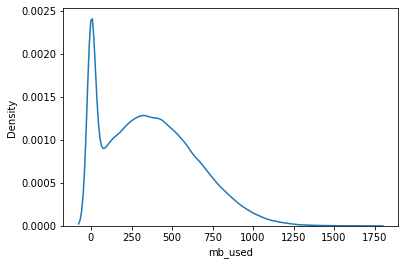

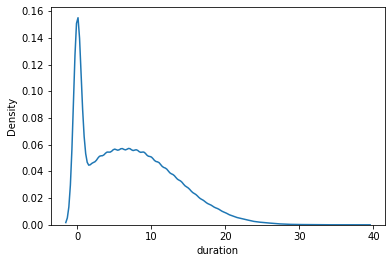

In [6]:
sns.kdeplot(data=internet, x='mb_used')
plt.show()
sns.kdeplot(data=calls, x='duration')
plt.show()

Посмотрим на долю нулевых значений в calls 'duration' и internet 'gb_used'

In [7]:
print('Количество звонков, продолжительностью 0 минут', len(calls[calls['duration']==0]))
print('Доля нулевой продолжительности звонка:', round((calls.loc[calls['duration']==0]['duration'].count()/len(calls))*100, 2), '%')
print()
print('Количество пользователей, использовавших 0 Гб', len(internet[internet['gb_used']==0]))
print('Доля нулевого трафика :', round((internet.loc[internet['gb_used']==0]['gb_used'].count()/len(internet))*100, 2), '%')

Количество звонков, продолжительностью 0 минут 39613
Доля нулевой продолжительности звонка: 19.55 %

Количество пользователей, использовавших 0 Гб 19598
Доля нулевого трафика : 13.12 %


По условию сказано, что округление всегда происходит в большую сторону и оплата за интернет сессии расчитывается по гигабайтам. Оставшиеся нулевые значения мб лучше оставить - по ним в дальнейшем будет производиться расчет прибыли за каждого клиента, что может повлиять на общую прибыль.

В плане работы сказано, что нулевые значения  продолжительности звонков - пропущенные звонки, поэтому удалять их не будем, но рассмотрим их влияние на среднее и медиану:

In [8]:
display(calls.loc[calls['duration']!=0].describe().T)
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,162994.0,8.897880,5.353761,1.0,5.0,8.0,12.0,38.0
user_id,162994.0,1254.149877,144.751050,1000.0,1126.0,1261.0,1379.0,1499.0


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,7.158198,5.959173,0.0,2.0,6.0,11.0,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Если в дальнейшем понадобится медиана для продолжительности звонка, будем обращаться к непропущенным звонкам:

In [9]:
non_nul_calls = calls.loc[calls['duration']!=0]

Для учета количества отправленных сообщений создадим столбец 'message_count': в таблице учтены все отправленные сообщения, поэтому просто создадим единичный столбец. 

In [10]:
messages['message_count'] = 1

Поскольку в данных есть 38 пользователей, переставших пользоваться услугами компании, создадим столбец, где True - пользователь, False - бывший пользователь.

In [11]:
users.loc[users['churn_date'].isna()==True, 'is_user'] = False
users.loc[users['churn_date'].isna()==False,'is_user'] = True
users['is_user'].value_counts()

False    462
True      38
Name: is_user, dtype: int64

### Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Для этого создадим общий dataframe:

In [12]:
calls_pivot = calls.pivot_table(values='duration', index=['user_id','month'], aggfunc={'duration': ['count', 'sum']})
calls_pivot.rename(columns={'count':'calls_count', 'sum':'total_duration'}, inplace=True)
internet_pivot = internet.pivot_table(values='gb_used', index=['user_id', 'month'], aggfunc={'gb_used':'sum'})
internet_pivot.rename(columns={'gb_used':'total_gb_used'}, inplace=True)
message_pivot = messages.pivot_table(values='message_count', index=['user_id', 'month'], aggfunc={'message_count':'count'})

df = calls_pivot.merge(internet_pivot, on=['user_id','month'], how='outer').merge(message_pivot, on=['user_id','month'], how='outer')
df['total_gb_used'] = np.ceil(df['total_gb_used'])

df.head(20)

calls_count  total_duration  total_gb_used  message_count
user_id month                                                                
1000    2018-05-01         22.0           159.0            3.0           22.0
        2018-06-01         43.0           172.0           23.0           60.0
        2018-07-01         47.0           340.0           14.0           75.0
        2018-08-01         52.0           408.0           14.0           81.0
        2018-09-01         58.0           466.0           15.0           57.0
        2018-10-01         57.0           350.0           15.0           73.0
        2018-11-01         43.0           338.0           15.0           58.0
        2018-12-01         46.0           333.0           10.0           70.0
1001    2018-11-01         59.0           430.0           18.0            NaN
        2018-12-01         63.0           414.0           14.0            NaN
1002    2018-06-01         15.0           117.0           11.0            4.0
        2018-07-01         26.0           214.0           18.0           11.0
        2018-08-01         42.0           289.0           20.0           13.0
        2018-09-01         36.0           206.0           17.0            4.0
        2018-10-01         33.0           212.0           14.0           10.0
        2018-11-01         32.0           243.0           19.0           16.0
        2018-12-01         33.0           236.0           18.0           12.0
1003    2018-08-01         55.0           380.0            9.0           37.0
        2018-09-01        134.0           961.0           13.0           91.0
        2018-10-01        108.0           855.0           15.0           83.0

In [13]:
display(df.describe().T)
print(df.columns)
print()
print(df.isna().sum())
print()
print(len(df))


,count,mean,std,min,25%,50%,75%,max
calls_count,3174.0,63.833333,32.678036,1.0,41.0,63.0,83.0,244.0
total_duration,3174.0,456.931632,238.031270,0.0,290.0,447.0,592.0,1673.0
total_gb_used,3203.0,17.358414,7.343379,0.0,13.0,17.0,21.0,49.0
message_count,2717.0,45.283769,35.051363,1.0,19.0,38.0,63.0,224.0


Index(['calls_count', 'total_duration', 'total_gb_used', 'message_count'], dtype='object')

calls_count        40
total_duration     40
total_gb_used      11
message_count     497
dtype: int64

3214


Nan значения образовались из-за соединения таблиц, в исходных данных nan-значений не было, поэтому все наны в df заменим 0.

In [14]:
df['calls_count'] = df['calls_count'].fillna(0)
df['total_duration'] = df['total_duration'] .fillna(0)
df['total_gb_used'] = df['total_gb_used'].fillna(0)
df['message_count'] = df['message_count'].fillna(0)

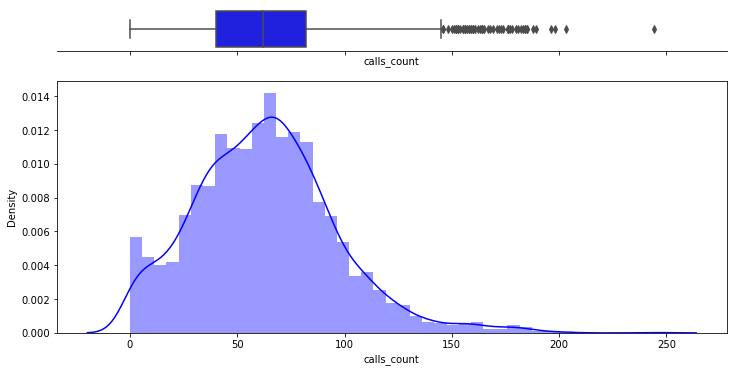

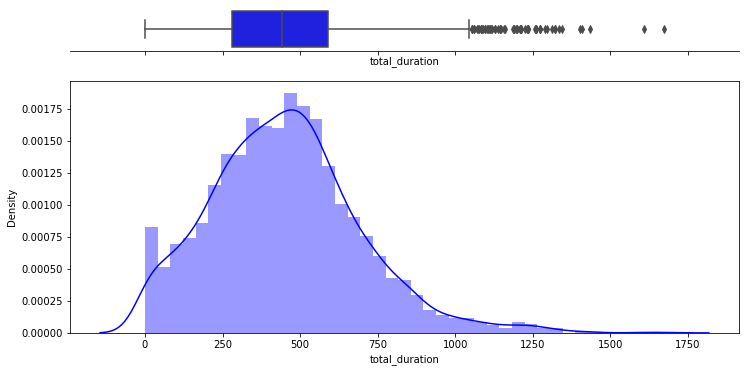

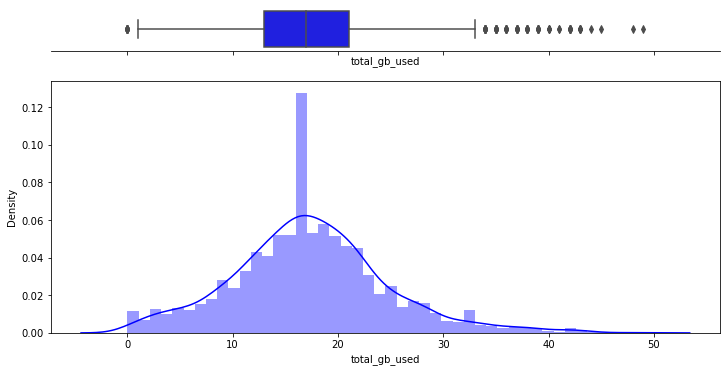

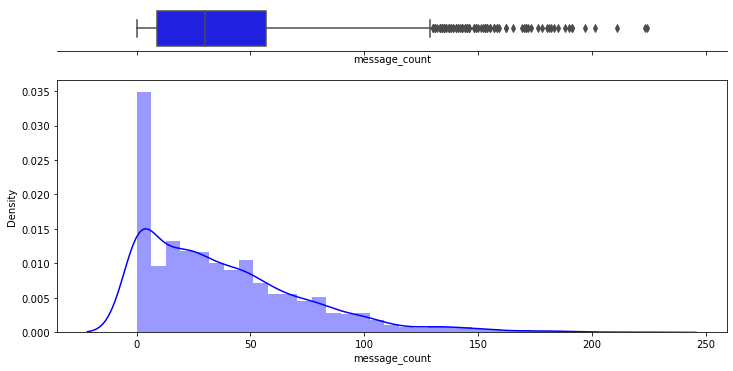

In [15]:
def draw_distribution(vals, color):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      gridspec_kw={"height_ratios": (.15, .85)},
                                      figsize=(12, 6))
  
    sns.boxplot(vals, ax=ax_box, color=color)
    sns.distplot(vals, ax=ax_hist, color=color)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_box, left=True)
    
for col in df.columns:
    draw_distribution(vals=df[col], color='blue')

Добавим данные о пользователях: какой тариф используется и является ли он текущим клиентом:

In [16]:
df = users[['user_id','city','tariff', 'is_user']].merge(df.reset_index(), on=['user_id'], how='left')
# Отсортированная таблица
df = df.sort_values(by=['user_id','tariff','city', 'is_user','month'], ascending=True)
# Сводная таблица
df_pivot = df.pivot_table(index=['user_id','tariff','city', 'is_user','month'], values=['calls_count', 'total_duration', 'total_gb_used', 'message_count'])

Создадим функцию, которая вычислит доход с каждого клиента: передается два параметра - данные о пользователях и данные о тарифе, который формирует прибыль. 

In [17]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [18]:
def total_income(row):
    messages = row['message_count']
    gb_used = row['total_gb_used']
    call_duration = row['total_duration']
    tariff = row['tariff']
    total_income = 0
    for index in range(len(tariffs)):
        
        if (tariff == tariffs.loc[index, 'tariff_name']):
            total_income += tariffs.loc[index, 'rub_monthly_fee']
            if (call_duration > tariffs.loc[index, 'minutes_included']):
                total_income += (call_duration-tariffs.loc[index, 'minutes_included'])*tariffs.loc[index, 'rub_per_minute']
            if (gb_used > tariffs.loc[index, 'gb_per_month_included']):
                total_income += (gb_used-tariffs.loc[index, 'gb_per_month_included'])*tariffs.loc[index, 'rub_per_gb']
            if (messages > tariffs.loc[index, 'messages_included']):
                total_income += (messages-tariffs.loc[index, 'messages_included'])*tariffs.loc[index, 'rub_per_message']
            return(total_income)

#total_income(row=df, income_dict=tariffs)
#df.head(10)

In [19]:
df['total_income'] = df.apply(total_income, axis=1)
df.head(20)

,user_id,city,tariff,is_user,month,calls_count,total_duration,total_gb_used,message_count,total_income
0,1000,Краснодар,ultra,False,2018-05-01,22.0,159.0,3.0,22.0,1950.0
1,1000,Краснодар,ultra,False,2018-06-01,43.0,172.0,23.0,60.0,1950.0
2,1000,Краснодар,ultra,False,2018-07-01,47.0,340.0,14.0,75.0,1950.0
3,1000,Краснодар,ultra,False,2018-08-01,52.0,408.0,14.0,81.0,1950.0
4,1000,Краснодар,ultra,False,2018-09-01,58.0,466.0,15.0,57.0,1950.0
5,1000,Краснодар,ultra,False,2018-10-01,57.0,350.0,15.0,73.0,1950.0
6,1000,Краснодар,ultra,False,2018-11-01,43.0,338.0,15.0,58.0,1950.0
7,1000,Краснодар,ultra,False,2018-12-01,46.0,333.0,10.0,70.0,1950.0
8,1001,Москва,smart,False,2018-11-01,59.0,430.0,18.0,0.0,1150.0
9,1001,Москва,smart,False,2018-12-01,63.0,414.0,14.0,0.0,550.0


## 3. Анализ данных <a id="step3"></a>   
</div>

Опишем поведение клиентов оператора, исходя из выборки. Расчитаем:
- сколько минут разговора, 
- сколько сообщений и
- какой объём интернет-трафика 

требуется пользователям каждого тарифа в месяц.

Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишите распределения.

In [20]:
df.loc[df['tariff'] == 'ultra', 'id_tariff'] = 1
df.loc[df['tariff'] == 'smart', 'id_tariff'] = 0
df['id_tariff'] = df['id_tariff'].astype('int')


In [21]:
# Составим таблицу с показателями израсходованных смс, трафика, минут (0 - пропущенные вызовы - удалим) за месяц для каждого пользователя
clients_behavior = df.pivot_table(index=['user_id', 'month'], values=['id_tariff','total_duration', 'total_gb_used', 'message_count', 'total_income'])
clients_behavior_smart = clients_behavior.query('id_tariff == 0 ').drop(labels='id_tariff', axis = 1)
clients_behavior_ultra = clients_behavior.query('id_tariff == 1').drop(labels='id_tariff', axis = 1)

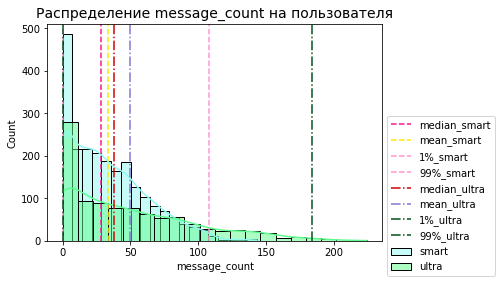

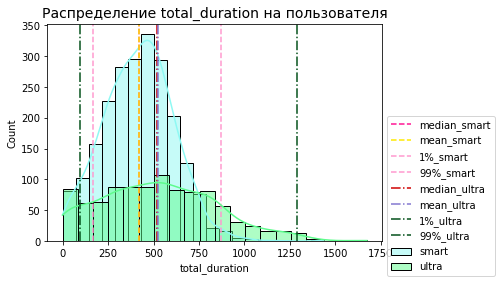

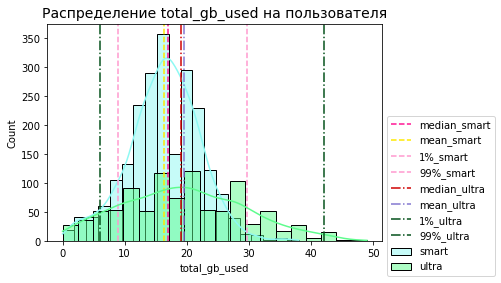

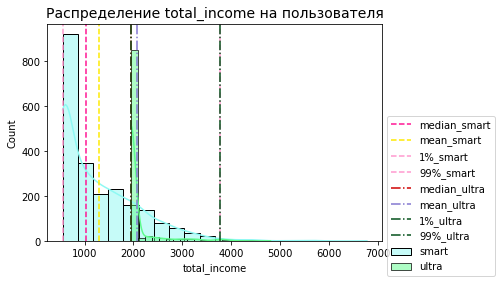

In [23]:
for col in clients_behavior_smart.columns:
    sns.histplot(clients_behavior_smart[col], kde = True, color='#8EF9F3', bins=20, label='smart') # голубой
    plt.title('Распределение '+col+' на пользователя', fontsize=14)
    plt.axvline(clients_behavior_smart[col].median(),linestyle = '--', color = '#FF1493', label = 'median_smart')
    plt.axvline(clients_behavior_smart[col].mean(),linestyle = '--', color = '#FEEA00', label = 'mean_smart')
    plt.axvline(clients_behavior_smart[col].quantile(0.1),linestyle = '--', color = '#ff99cf', label = '1%_smart')
    plt.axvline(clients_behavior_smart[col].quantile(0.99),linestyle = '--', color = '#ff99cf', label = '99%_smart')
    plt.legend(bbox_to_anchor=(1, 0.6))
    
    sns.histplot(clients_behavior_ultra[col], kde = True,  color='#5EFC8D', bins=20, label='ultra') # зеленый
    plt.axvline(clients_behavior_ultra[col].median(),linestyle = '-.', color = '#D00000', label = 'median_ultra')
    plt.axvline(clients_behavior_ultra[col].mean(),linestyle = '-.', color = '#8377D1', label = 'mean_ultra')
    plt.axvline(clients_behavior_ultra[col].quantile(0.1),linestyle = '-.', color = '#025019', label = '1%_ultra')
    plt.axvline(clients_behavior_ultra[col].quantile(0.99),linestyle = '-.', color = '#025019', label = '99%_ultra')
    plt.legend(bbox_to_anchor=(1, 0.6))
    
    plt.show()


In [24]:
# Распределение по месяцам
clients_behavior_month = df.query('total_duration != 0').pivot_table(index=['month', 'user_id'], values=['id_tariff','total_duration', 'total_gb_used', 'message_count', 'total_income'])
clients_behavior_month_smart = clients_behavior.query('id_tariff == 0 ').pivot_table(index=['month'], values=['id_tariff','total_duration', 'total_gb_used', 'message_count', 'total_income'], aggfunc='mean').drop(labels='id_tariff', axis = 1)
clients_behavior_month_ultra = clients_behavior.query('id_tariff == 1').pivot_table(index=['month'], values=['id_tariff','total_duration', 'total_gb_used', 'message_count', 'total_income'], aggfunc='mean').drop(labels='id_tariff', axis = 1)

In [25]:
clients_behavior_month_smart.columns

Index(['message_count', 'total_duration', 'total_gb_used', 'total_income'], dtype='object')

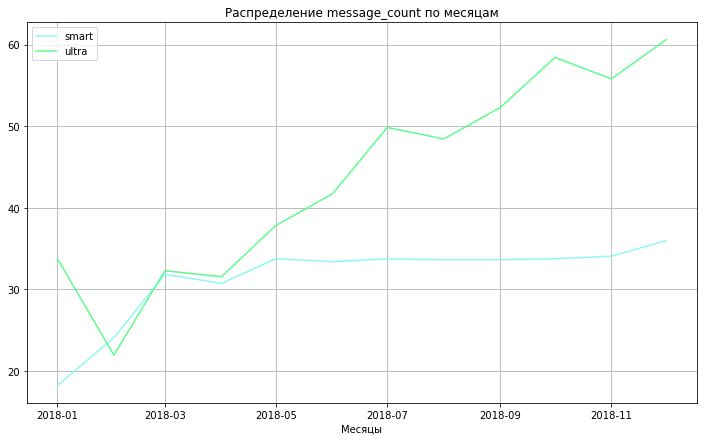

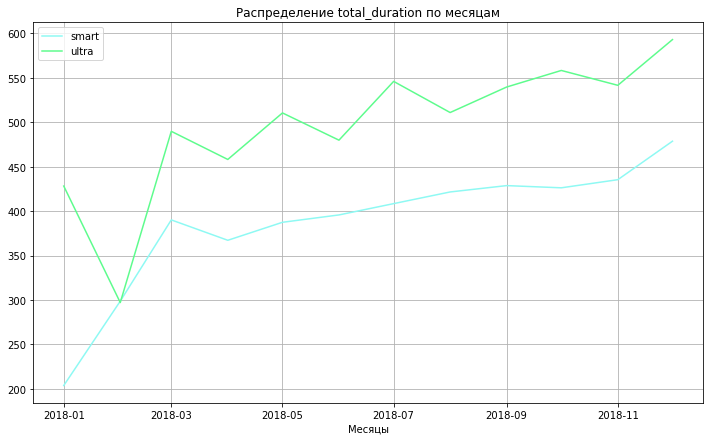

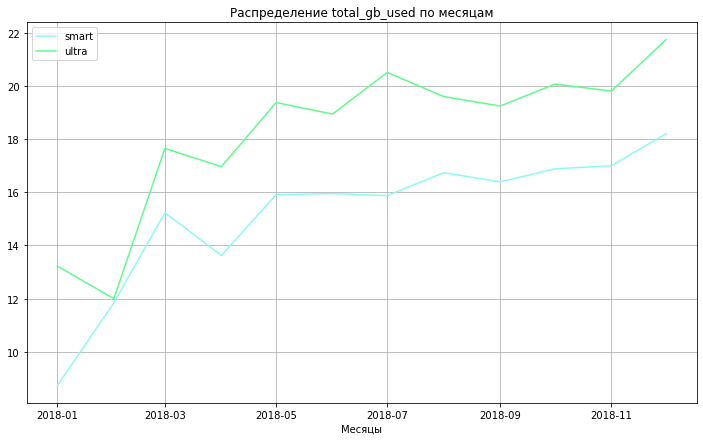

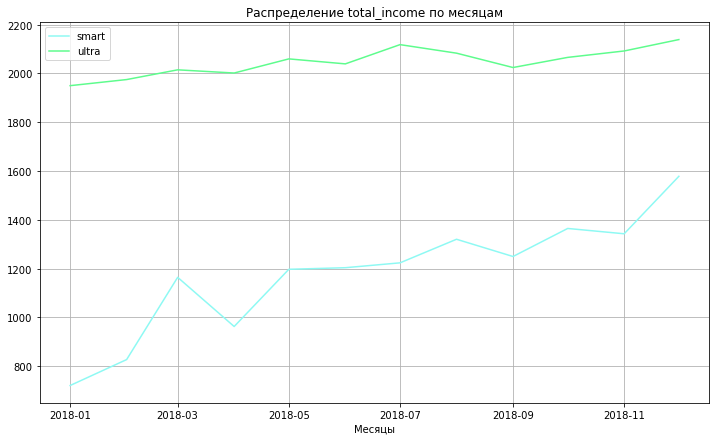

In [57]:
for column in clients_behavior_month_smart.columns:
    plt.figure(figsize = (12,7))
    plt.title('Распределение '+column+' по месяцам')
    plt.plot(clients_behavior_month_smart[column], color = '#8EF9F3', label='smart')
    plt.plot(clients_behavior_month_ultra[column], color = '#5EFC8D', label='ultra')
    plt.legend()
    plt.xlabel('Месяцы')
    plt.grid()
    plt.show()

In [27]:
stat_ultra = pd.DataFrame(clients_behavior_ultra.describe())
stat_smart = pd.DataFrame(clients_behavior_smart.describe())
stat = stat_smart.join(stat_ultra, how='outer', lsuffix='_smart', rsuffix='_ultra').T

stat[stat.index.isin(['total_income_smart', 'total_income_ultra'])]

,count,mean,std,min,25%,50%,75%,max
total_income_smart,2229.0,1289.973531,818.404367,550.0,550.0,1023.0,1750.0,6770.0
total_income_ultra,985.0,2070.152284,376.187114,1950.0,1950.0,1950.0,1950.0,4800.0


In [28]:
stat

,count,mean,std,min,25%,50%,75%,max
message_count_smart,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0
total_duration_smart,2229.0,417.934948,190.313730,0.0,282.0,422.0,545.0,1435.0
total_gb_used_smart,2229.0,16.328847,5.747061,0.0,13.0,17.0,20.0,38.0
total_income_smart,2229.0,1289.973531,818.404367,550.0,550.0,1023.0,1750.0,6770.0
message_count_ultra,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0
total_duration_ultra,985.0,526.623350,317.606098,0.0,284.0,518.0,752.0,1673.0
total_gb_used_ultra,985.0,19.494416,9.853511,0.0,12.0,19.0,27.0,49.0
total_income_ultra,985.0,2070.152284,376.187114,1950.0,1950.0,1950.0,1950.0,4800.0


In [29]:
clients_behavior_smart.columns

Index(['message_count', 'total_duration', 'total_gb_used', 'total_income'], dtype='object')

In [30]:
print(clients_behavior_smart['total_duration'].quantile(0.66))
clients_behavior_ultra['total_duration'].quantile(0.99)

499.0


1291.12

In [31]:
print(clients_behavior_smart['total_gb_used'].quantile(0.4))
clients_behavior_ultra['total_gb_used'].quantile(0.9999)

15.0


48.90159999999992

In [32]:
# Количество пользователей smart, которые переплачивают за тарифы
print(100 - round((len(clients_behavior_smart.query('total_income == 550'))/len(clients_behavior_smart))*100, 2))
# Те, кто пользуется услугами в тамках тарифа ультра
print(round((len(clients_behavior_ultra.query('total_income == 1950'))/len(clients_behavior_ultra))*100, 2))

74.56
86.4


In [46]:
round((df.query('tariff =="smart"')['total_income'].sum()/len(df))*100, 2)

89424.78

In [56]:
print('Доля выручки тарифа  smart:', round(((df.query('tariff =="smart"')['total_income'].sum())/(df['total_income'].sum()))*100, 2), '%')
print('Доля выручки тарифа  ultra:', round(((df.query('tariff =="ultra"')['total_income'].sum())/(df['total_income'].sum()))*100, 2), '%')

Доля выручки тарифа  smart: 58.49 %
Доля выручки тарифа  ultra: 41.51 %


<AxesSubplot:>

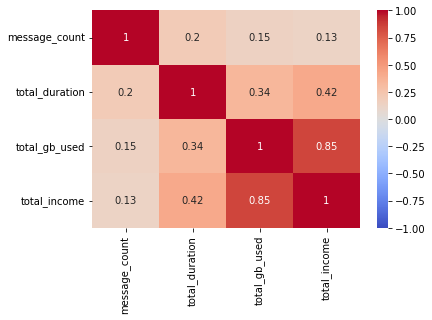

In [33]:
sns.heatmap(clients_behavior_smart.corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

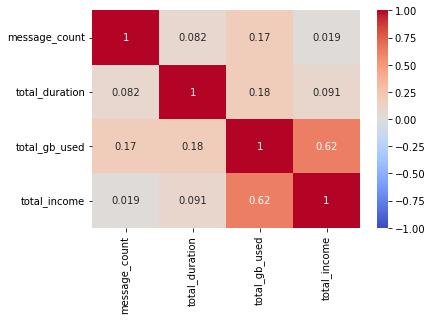

In [34]:
sns.heatmap(clients_behavior_ultra.corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)

Выводы:

- по корреляции видно, что больше всего на прибыль влияет количество использованных Гб для обоих тарифов, для smart коэффициент корреляции больше (0.85 vs 0.62), на прибыль от тарифа смарт влияет также продолжительность разговора (коэффициент корреляции 0.42)


- среднее количество отправленных сообщений у тарифа Ультра растёт в течение года, но при этом не достигает даже половины от включённых в тариф (60 на пике vs 1000 в тарифе). Пики для обоих тарифов в нуле, заметим, что у 50 сообщений (границы включённых в тариф) наблюдается пик. Максимального порогового значения включённых в тариф Ультра сообщений - 1000 штук - нет, максимально отправленное пользователем - 244 сообщения.


- в среднем в течение года пользователей тарифа смарт не превышали лимита (66%), 34% доплачивают ли за дополнительные минуты. Из пользователей Ультра никто не наговорил 3000 минут, заложенных тариф, в половину тарифа уложились почти все пользователи. Заметим, что медианная продолжительность разговора за месяц пользователей тарифа Ультра (529 мин) больше пользователей тарифа смарт (423 мин). Думаю, это связано с ограничением Смарт в 500 минут.


- среднее значение использованных гигабайт в месяц у пользователей тарифа  Ультра больше, чем у пользователей smart. Значительно снижены показатели израсходованного трафика в январе-феврале у обоих тарифов. Заметим, что ограничение в 15 ГБ для пользователей тарифа смарт мало: в 8 из 12 месяцев среднее значение израсходованного трафика по пользователям превышает 15 ГБ - всего 40% пользователей укладываются в тариф. При этом 99% пользователей тарифа Ультра не превышает лимит в течение года.


- тариф Ультра приносит компании больше прибыли, однако за счет ограничений тарифа Смарт и высокого ценника за переплату медианное значение платежа пользователя тарифа смарт почти в два раза больше заявленной стоимости тарифа. 74,16% пользователей тарифа смарт переплачивают по тарифу. Думаю, компании необходимо разработать еще один тариф, который будет включать больше ГБ и соответственно стоить дороже, чем тариф смарт. Думаю, что так же большая часть пользователей будет переплачивать за тариф, тк потребности в количестве гб только растет (исходя из графиков распределения Гб по месяцам)

## 4. Проверка гипотез <a id="step4"></a>   
</div>

### H0: Средняя выручка пользователей тарифов равна
H1: Средняя выручка пользователей тарифов разная

Уровень значимости: 1%

In [35]:
ultra = df.query('tariff == "ultra"')['total_income']
smart = df.query('tariff == "smart"')['total_income']

alpha = .01

results = st.ttest_ind(smart, ultra, equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средняя выручка тарифа "ultra": ', ultra.median())
print('Средняя выручка тарифа "smart": ', smart.median())

p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу
Средняя выручка тарифа "ultra":  1950.0
Средняя выручка тарифа "smart":  1021.0


### H0: Средняя выручка пользователей из разных городов тарифов равна
H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов 

Уровень значимости: 1%

In [36]:
moscow = df.query('city == "Москва"')['total_income']
regions = df.query('city != "Москва"')['total_income']

alpha = .01

results = st.ttest_ind(regions, moscow, equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средняя выручка регионов: ', regions.median())
print('Средняя выручка Москвы: ', moscow.median())

p-значение:  0.5216952110000278
Не получилось отвергнуть нулевую гипотезу
Средняя выручка регионов:  1583.0
Средняя выручка Москвы:  1750.0


Использовали гипотезу о равенстве средних двух генеральных совокупностей:
- генеральные совокупности не зависят друг от друга
- выборочные средние совокупностей всегда распределены нормально воккруг истинного среднего этой совокупности
- значение альфа взяли равной 1%, так как при таком значении вероятности событие уже можно считать неслучайным для такой не сильно большой выборки.

**Вывод**
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
- средняя выручка пользователей тарифов smart и ultra разная

## 5. Вывод <a id="step5"></a>   
</div>

На этапе обработки данных были изменены типы данных, сведен общий датасет, на основе которого был произведен анализ:

Больше всего на прибыль влияет количество использованных Гб для обоих тарифов, для smart коэффициент корреляции больше (0.85 vs 0.62), на прибыль от тарифа смарт влияет также продолжительность разговора (коэффициент корреляции 0.42)

Тариф Ультра приносит компании больше стабильной прибыли, однако за счет ограничений тарифа Смарт и высокого ценника за переплату медианное значение платежа пользователя тарифа смарт почти в два раза больше заявленной стоимости тарифа. 74,16% пользователей тарифа смарт переплачивают по тарифу. Думаю, компании необходимо разработать еще один тариф, который будет включать больше ГБ и соответственно стоить дороже, чем тариф смарт, или изменить ценообразование тарифа смарт: включить больше гб и повысить стоимость - но есть риск оттока клиентов. При создании нового тарифа думаю, что так же большая часть пользователей будет переплачивать за тариф, тк потребности в количестве гб только растет (исходя из графиков распределения Гб по месяцам).

Итоги анализа тарифного плана оператора: 

- Среднее количество отправленных сообщений у тарифа Ультра растёт в течение года, но при этом не достигает даже половины от включённых в тариф (60 на пике vs 1000 в тарифе). Пики для обоих тарифов в нуле, заметим, что у 50 сообщений (границы включённых в тариф) наблюдается пик. Максимального порогового значения включённых в тариф Ультра сообщений - 1000 штук - нет, максимально отправленное пользователем - 244 сообщения.


- в среднем в течение года пользователей тарифа смарт не превышали лимита (66%), 34% доплачивают ли за дополнительные минуты. Из пользователей Ультра никто не наговорил 3000 минут, заложенных тариф, в половину тарифа уложились почти все пользователи. Заметим, что медианная продолжительность разговора за месяц пользователей тарифа Ультра (529 мин) больше пользователей тарифа смарт (423 мин). Думаю, это связано с ограничением Смарт в 500 минут.


- среднее значение использованных гигабайт в месяц у пользователей тарифа Ультра больше, чем у пользователей smart. Значительно снижены показатели израсходованного трафика в январе-феврале у обоих тарифов. Заметим, что ограничение в 15 ГБ для пользователей тарифа смарт мало: в 8 из 12 месяцев среднее значение израсходованного трафика по пользователям превышает 15 ГБ - всего 40% пользователей укладываются в тариф. При этом 99% пользователей тарифа Ультра не превышает лимит в течение года.


Отвечая на вопрос какой тариф лучше, могу сказать, что с точки зрения компании тариф ultra приносит постоянную долю выручки, в отличие от тарифа smart - по графику распределения средней прибыли по месяцам видно, что прибыль распределена в течение года неравномерно. 

Гипотезы, которые выдвигались в начале исследования:

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
- средняя выручка пользователей тарифов smart и ultra разная